#### In this code, we fetch five years of historical stock data for AMD, Intel, and Nvidia using Yahoo Finance API. Then, we create a portfolio DataFrame, adding 1000 shares of each stock and calculating the total portfolio value. Finally, we display the portfolio data, including the close price of the portfolio, rounded to two decimal places.

In [1]:
import pandas as pd
import yfinance as yf

# Define the symbols for Nvidia, Intel, and AMD
symbols = ['AMD', 'INTC', 'NVDA']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 10 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbols
portfolio_df.columns = symbols

# Add a column for the number of shares (1000 shares for each stock)
portfolio_df['Shares_AMD'] = 1000
portfolio_df['Shares_INTC'] = 1000
portfolio_df['Shares_NVDA'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                       portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                       portfolio_df['NVDA'] * portfolio_df['Shares_NVDA'])

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Close_Price'] = ((portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                       portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                       portfolio_df['NVDA'] * portfolio_df['Shares_NVDA']))/3000

# Round the portfolio value columns to 2 decimal places
portfolio_df = portfolio_df.round({'AMD': 2, 'INTC': 2, 'NVDA': 2, 'Portfolio_Value': 2, 'Portfolio_Close_Price': 2})

# Print the first few rows of the portfolio DataFrame
display(portfolio_df.head())
display(portfolio_df.tail())



[*********************100%%**********************]  3 of 3 completed


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price
Date,,,,,,,,
2019-04-01,26.36,47.70,45.26,1000,1000,1000,119322.79,39.77
2019-04-02,26.75,47.57,45.44,1000,1000,1000,119760.30,39.92
2019-04-03,29.02,48.55,46.83,1000,1000,1000,124405.88,41.47
2019-04-04,29.09,48.94,46.75,1000,1000,1000,124771.53,41.59
2019-04-05,28.98,48.66,47.41,1000,1000,1000,125049.43,41.68


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price
Date,,,,,,,,
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,388.37
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16
2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98,381.82
2024-03-27,179.59,43.77,902.50,1000,1000,1000,1125860.00,375.29
2024-03-28,180.49,44.17,903.56,1000,1000,1000,1128220.00,376.07


#### In this code, we utilize Matplotlib to plot the performance of our portfolio over the last five years. We plot the portfolio unit price against the date, showcasing how the value of our portfolio has evolved over time. The resulting graph provides a visual representation of our portfolio's performance, aiding in analysis and decision-making.

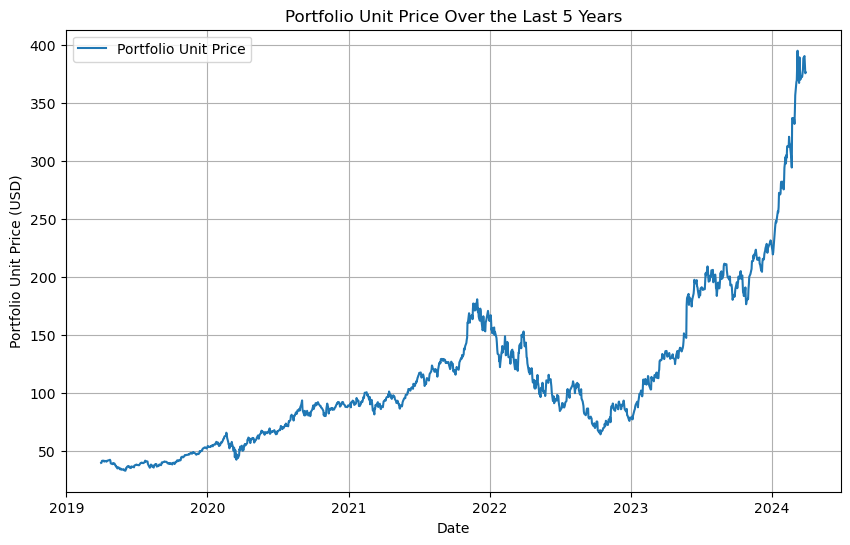

In [2]:
import matplotlib.pyplot as plt

# Plot the portfolio value for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Portfolio_Close_Price'], label='Portfolio Unit Price')
plt.title('Portfolio Unit Price Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Portfolio Unit Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

#### In this segment, we calculate the daily percentage change in the portfolio value and visualize it over the last five years. By computing the percentage change in the portfolio's unit price on a daily basis, we gain insights into the volatility and trends of our portfolio's performance. The resulting plot provides a clear depiction of the daily fluctuations in our portfolio's value, aiding in risk assessment and investment strategy evaluation.

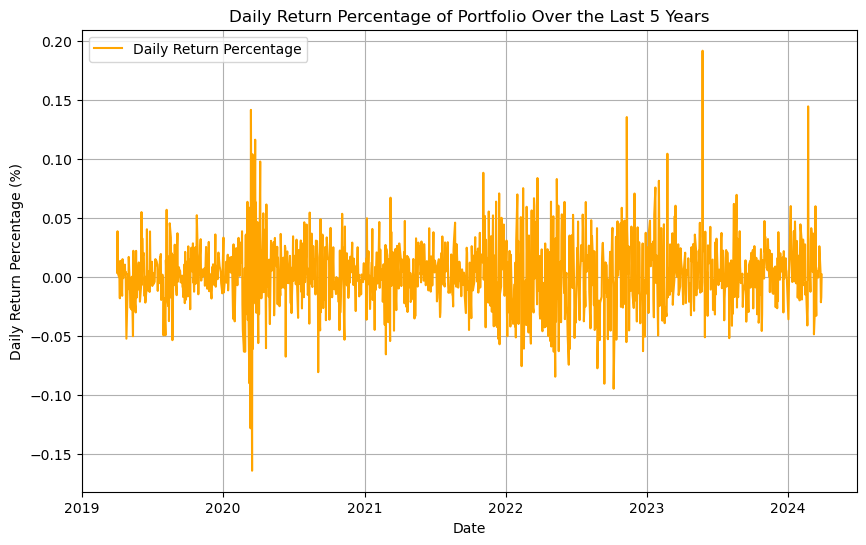

In [3]:
# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Plot the daily return percentage for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Daily_Return_Percentage'], label='Daily Return Percentage', color='orange')
plt.title('Daily Return Percentage of Portfolio Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

#### Here, we compute the daily percentage change in the portfolio's close price and drop any resulting NaN values. This calculation allows us to assess the daily fluctuations in the portfolio's value with respect to its close price. By eliminating NaN values, we ensure consistency in our data for further analysis and interpretation. Below are the first few rows of the updated portfolio DataFrame, reflecting the calculated daily percentage change in the portfolio's close price.

In [4]:
# Calculate daily percentage change in portfolio_close_price
portfolio_df['Daily_Return_Close_Price_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Print the first few rows of the portfolio DataFrame
portfolio_df

,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage,Daily_Return_Close_Price_Percentage
Date,,,,,,,,,,
2019-04-02,26.75,47.57,45.44,1000,1000,1000,119760.30,39.92,0.003772,0.003772
2019-04-03,29.02,48.55,46.83,1000,1000,1000,124405.88,41.47,0.038828,0.038828
2019-04-04,29.09,48.94,46.75,1000,1000,1000,124771.53,41.59,0.002894,0.002894
2019-04-05,28.98,48.66,47.41,1000,1000,1000,125049.43,41.68,0.002164,0.002164
2019-04-08,28.53,48.73,47.62,1000,1000,1000,124878.02,41.63,-0.001200,-0.001200
...,...,...,...,...,...,...,...,...,...,...
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,388.37,0.026131,0.026131
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16,0.004609,0.004609
2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98,381.82,-0.021376,-0.021376


#### Below are the columns present in the portfolio DataFrame after the calculations. These columns provide comprehensive information about the portfolio's composition and performance, facilitating further analysis and decision-making.

In [5]:
portfolio_df.columns

Index(['AMD', 'INTC', 'NVDA', 'Shares_AMD', 'Shares_INTC', 'Shares_NVDA',
       'Portfolio_Value', 'Portfolio_Close_Price', 'Daily_Return_Percentage',
       'Daily_Return_Close_Price_Percentage'],
      dtype='object')

#### In this segment, we utilize the extract_features function from the tsfresh library to extract features from the portfolio DataFrame. Prior to feature extraction, we reset the index to ensure a unique identifier for each timestamp. The extracted features provide valuable insights into the time series data, enabling further analysis and modeling

In [6]:
from tsfresh import extract_features

# Reset index to have a unique identifier for each timestamp
portfolio_df.reset_index(inplace=True)

# Extract features
extracted_features = extract_features(portfolio_df, column_id='Date')

# Print the extracted features
print(extracted_features.head())

Feature Extraction: 100%|██████████| 20/20 [00:44<00:00,  2.22s/it]


            Daily_Return_Close_Price_Percentage__variance_larger_than_standard_deviation  \
2019-04-02                                                0.0                              
2019-04-03                                                0.0                              
2019-04-04                                                0.0                              
2019-04-05                                                0.0                              
2019-04-08                                                0.0                              

            Daily_Return_Close_Price_Percentage__has_duplicate_max  \
2019-04-02                                                0.0        
2019-04-03                                                0.0        
2019-04-04                                                0.0        
2019-04-05                                                0.0        
2019-04-08                                                0.0        

            Daily_Return_C

In [7]:
extracted_features.head()

,Daily_Return_Close_Price_Percentage__variance_larger_than_standard_deviation,Daily_Return_Close_Price_Percentage__has_duplicate_max,Daily_Return_Close_Price_Percentage__has_duplicate_min,Daily_Return_Close_Price_Percentage__has_duplicate,Daily_Return_Close_Price_Percentage__sum_values,Daily_Return_Close_Price_Percentage__abs_energy,Daily_Return_Close_Price_Percentage__mean_abs_change,Daily_Return_Close_Price_Percentage__mean_change,Daily_Return_Close_Price_Percentage__mean_second_derivative_central,Daily_Return_Close_Price_Percentage__median,...,Daily_Return_Percentage__fourier_entropy__bins_5,Daily_Return_Percentage__fourier_entropy__bins_10,Daily_Return_Percentage__fourier_entropy__bins_100,Daily_Return_Percentage__permutation_entropy__dimension_3__tau_1,Daily_Return_Percentage__permutation_entropy__dimension_4__tau_1,Daily_Return_Percentage__permutation_entropy__dimension_5__tau_1,Daily_Return_Percentage__permutation_entropy__dimension_6__tau_1,Daily_Return_Percentage__permutation_entropy__dimension_7__tau_1,Daily_Return_Percentage__query_similarity_count__query_None__threshold_0.0,Daily_Return_Percentage__mean_n_absolute_max__number_of_maxima_7
2019-04-02,0.0,0.0,0.0,0.0,0.003772,0.000014,NaN,NaN,NaN,0.003772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-03,0.0,0.0,0.0,0.0,0.038828,0.001508,NaN,NaN,NaN,0.038828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-04,0.0,0.0,0.0,0.0,0.002894,0.000008,NaN,NaN,NaN,0.002894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,0.0,0.0,0.0,0.0,0.002164,0.000005,NaN,NaN,NaN,0.002164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-08,0.0,0.0,0.0,0.0,-0.001200,0.000001,NaN,NaN,NaN,-0.001200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Here, we preprocess the extracted features to remove columns with null values and those with zero variance, which might not contribute significantly to the analysis or modeling process. By filtering out such columns, we ensure that only relevant and informative features are retained for further processing.

In [8]:
# Remove columns with null values
extracted_features = extracted_features.dropna(axis=1)

# Remove columns with zero variance
extracted_features = extracted_features.loc[:, extracted_features.std() > 0]

extracted_features.head()

,Daily_Return_Close_Price_Percentage__sum_values,Daily_Return_Close_Price_Percentage__abs_energy,Daily_Return_Close_Price_Percentage__median,Daily_Return_Close_Price_Percentage__mean,Daily_Return_Close_Price_Percentage__root_mean_square,Daily_Return_Close_Price_Percentage__maximum,Daily_Return_Close_Price_Percentage__absolute_maximum,Daily_Return_Close_Price_Percentage__minimum,Daily_Return_Close_Price_Percentage__quantile__q_0.1,Daily_Return_Close_Price_Percentage__quantile__q_0.2,...,"Daily_Return_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Percentage__fft_coefficient__attr_""real""__coeff_0","Daily_Return_Percentage__fft_coefficient__attr_""abs""__coeff_0","Daily_Return_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Percentage__value_count__value_0,Daily_Return_Percentage__range_count__max_0__min_-1000000000000.0,Daily_Return_Percentage__range_count__max_1000000000000.0__min_0,Daily_Return_Percentage__count_above__t_0,Daily_Return_Percentage__count_below__t_0
2019-04-02,0.003772,0.000014,0.003772,0.003772,0.003772,0.003772,0.003772,0.003772,0.003772,0.003772,...,0.001034,0.000731,0.003772,0.003772,0.0,0.0,0.0,1.0,1.0,0.0
2019-04-03,0.038828,0.001508,0.038828,0.038828,0.038828,0.038828,0.038828,0.038828,0.038828,0.038828,...,0.010649,0.007530,0.038828,0.038828,0.0,0.0,0.0,1.0,1.0,0.0
2019-04-04,0.002894,0.000008,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,...,0.000794,0.000561,0.002894,0.002894,0.0,0.0,0.0,1.0,1.0,0.0
2019-04-05,0.002164,0.000005,0.002164,0.002164,0.002164,0.002164,0.002164,0.002164,0.002164,0.002164,...,0.000594,0.000420,0.002164,0.002164,0.0,0.0,0.0,1.0,1.0,0.0
2019-04-08,-0.001200,0.000001,-0.001200,-0.001200,0.001200,-0.001200,0.001200,-0.001200,-0.001200,-0.001200,...,-0.000329,-0.000233,-0.001200,0.001200,180.0,0.0,1.0,0.0,0.0,1.0


### In this code segment, the dataset is split into training and testing sets for machine learning model training and evaluation. The steps involved are:

#### Defining Testing Days:
Testing days are defined as every 5th day within the dataset's time range. This periodic interval ensures a balanced distribution of data for testing.

#### Splitting Data:
The dataset is split into two subsets: training data and testing data.
Training data (train_df) consists of observations not included in the defined testing days, ensuring temporal separation.
Testing data (test_df) comprises observations occurring on the specified testing days.

#### Preparing Data for Machine Learning:
Features (X_train and X_test) and target variables (y_train and y_test) are extracted from the training and testing subsets, respectively.
Features include Previous_Return, Rolling_Mean, and Rolling_Std, representing the previous return percentage and rolling statistics calculated earlier.


In [9]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np


# Feature Extraction
portfolio_df['Previous_Return'] = portfolio_df['Daily_Return_Percentage'].shift(1)
portfolio_df['Rolling_Mean'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).mean()
portfolio_df['Rolling_Std'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
portfolio_df.dropna(inplace=True)

# Define the testing days (every 4th day)
# testing_days = portfolio_df.index[::4]

# Define the testing days (every 5th day)
testing_days = portfolio_df.index[::5]

# Split data into training and testing sets based on testing days
train_df = portfolio_df[~portfolio_df.index.isin(testing_days)]
test_df = portfolio_df[portfolio_df.index.isin(testing_days)]

# Prepare data for machine learning
X_train = train_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_train = train_df['Daily_Return_Percentage']
X_test = test_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_test = test_df['Daily_Return_Percentage']


#### Model Training:
A linear regression model is instantiated and trained using the training data (X_train and y_train).

#### Model Evaluation:
The trained model's performance is evaluated using the testing data (X_test and y_test).
The R^2 score, indicating the proportion of variance explained by the model, is calculated.
The Mean Absolute Error (MAE), representing the average absolute difference between predicted and actual values, is computed.

#### Future Prediction:
Features for the next 30 days are generated, starting from the last available features in the training data.
Predictions for the future daily return percentages over the next 30 days are made using the trained linear regression model.
This process provides insights into the model's performance on unseen data and enables the forecasting of future portfolio performance based on historical trends and learned relationships

In [10]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Predict future daily return percentages for the next 30 days
last_features = X_train.tail(1)
next_30_days = pd.date_range(start=portfolio_df.index[-1], periods=30, freq='D')
future_features = pd.DataFrame(index=next_30_days, columns=X_train.columns)
future_features.iloc[0] = last_features.values[0]

for i in range(1, 30):
    future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))

future_predictions = model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)

R^2 Score: 0.19731675975839513
Mean Absolute Error: 0.019503274857752134
Future Predictions for the next 30 days:
[0.00649873 0.16483959 0.47884627 0.42417211 1.03700274 0.2379719
 1.04737369 0.22189236 1.2437514  0.96113463 1.1828212  0.67622946
 1.06680915 1.25735115 0.9319506  0.18095658 1.14408706 1.10399718
 0.67473423 0.55523791 1.08622257 0.85327044 0.91226532 0.4324651
 0.25819988 1.27478484 1.11509946 0.50816022 0.69881107 0.31448561]


In [11]:
future_predictions

array([0.00649873, 0.16483959, 0.47884627, 0.42417211, 1.03700274,
       0.2379719 , 1.04737369, 0.22189236, 1.2437514 , 0.96113463,
       1.1828212 , 0.67622946, 1.06680915, 1.25735115, 0.9319506 ,
       0.18095658, 1.14408706, 1.10399718, 0.67473423, 0.55523791,
       1.08622257, 0.85327044, 0.91226532, 0.4324651 , 0.25819988,
       1.27478484, 1.11509946, 0.50816022, 0.69881107, 0.31448561])

In [12]:
portfolio_df

,Date,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage,Daily_Return_Close_Price_Percentage,Previous_Return,Rolling_Mean,Rolling_Std
6,2019-04-10,27.83,48.79,47.70,1000,1000,1000,124316.24,41.44,0.013699,0.013699,-0.018016,0.006020,0.017296
7,2019-04-11,27.79,48.83,47.56,1000,1000,1000,124180.95,41.39,-0.001207,-0.001207,0.013699,0.005309,0.017505
8,2019-04-12,27.85,49.37,47.18,1000,1000,1000,124403.61,41.47,0.001933,0.001933,-0.001207,0.000038,0.009415
9,2019-04-15,27.33,49.25,45.86,1000,1000,1000,122442.61,40.81,-0.015915,-0.015915,0.001933,-0.002649,0.011013
10,2019-04-16,27.93,49.63,46.73,1000,1000,1000,124290.47,41.43,0.015192,0.015192,-0.015915,-0.000788,0.012901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,388.37,0.026131,0.026131,0.008688,0.002389,0.017722
1253,2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16,0.004609,0.004609,0.026131,0.007737,0.008650
1254,2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98,381.82,-0.021376,-0.021376,0.004609,0.004320,0.014070
1255,2024-03-27,179.59,43.77,902.50,1000,1000,1000,1125860.00,375.29,-0.017102,-0.017102,-0.021376,0.001125,0.016199


In [13]:
portfolio_df.columns

Index(['Date', 'AMD', 'INTC', 'NVDA', 'Shares_AMD', 'Shares_INTC',
       'Shares_NVDA', 'Portfolio_Value', 'Portfolio_Close_Price',
       'Daily_Return_Percentage', 'Daily_Return_Close_Price_Percentage',
       'Previous_Return', 'Rolling_Mean', 'Rolling_Std'],
      dtype='object')

### This code segment utilizes Facebook's Prophet library to forecast the future performance of the portfolio. The process involves the following steps:

#### Daily Percentage Change Calculation:

Daily percentage change in portfolio value is calculated based on the Portfolio_Value column of the DataFrame.

#### Data Preparation for Prophet:

NaN values resulting from the calculation are dropped to ensure data consistency.
The DataFrame is prepared in a format suitable for Prophet, consisting of two columns: ds (date) and y (daily return percentage).

#### Model Fitting:

A Prophet model is instantiated and fitted using the prepared DataFrame.

#### Future Date Generation:

A DataFrame with future dates for the next 30 days is created using the make_future_dataframe method.

#### Prediction:

Using the fitted model, predictions are made for the future performance of the portfolio over the next 30 days.
The predicted values are extracted from the forecast DataFrame.

In [14]:
from prophet import Prophet

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Prepare data for Prophet
prophet_df = portfolio_df.reset_index()[['Date', 'Daily_Return_Percentage']].rename(columns={'Date': 'ds', 'Daily_Return_Percentage': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame with future dates for the next 30 days
future_dates = model.make_future_dataframe(periods=30)

# Make predictions using the fitted model
forecast = model.predict(future_dates)

# Extract the predicted values for the next 30 days
predicted_values = forecast[['ds', 'yhat']].tail(30)


16:19:09 - cmdstanpy - INFO - Chain [1] start processing
16:19:09 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Display predicted return percentage values for the next 30 days (Prophet)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
1250,2024-03-29,0.411978,-3.179720,4.233669
1251,2024-03-30,0.465324,-3.128593,4.308983
1252,2024-03-31,0.427924,-3.251210,4.132680
1253,2024-04-01,0.753472,-2.983375,4.093915
1254,2024-04-02,0.520413,-2.917188,4.213308
1255,2024-04-03,0.363144,-2.912283,3.815035
1256,2024-04-04,0.598867,-3.065635,4.175426
1257,2024-04-05,0.122002,-3.379380,3.905867
1258,2024-04-06,0.163254,-3.478462,4.177859
1259,2024-04-07,0.117690,-3.482448,3.716044


### In this section, predictions from both the linear regression model and the Prophet model are combined for comparison. The following steps are undertaken:

#### Conversion to DataFrame:

Predictions from the linear regression model (future_predictions) are converted into a DataFrame (future_predictions_df) with column name 'LR_Predictions'.

#### Concatenation:

The Prophet predictions DataFrame (predicted_values) and the linear regression predictions DataFrame are concatenated along the columns axis to create a combined predictions DataFrame (combined_predictions_df).

#### Index Alignment:

The index of the linear regression predictions DataFrame is set to match the index of the Prophet predictions DataFrame for alignment.

#### Displaying Combined Predictions:

The combined predictions DataFrame is displayed, providing a comparative view of predictions from both models over the next 30 days.

In [16]:
# Convert the future_predictions array to a DataFrame
future_predictions_df = pd.DataFrame(future_predictions, columns=['LR_Predictions'])

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Set the index of the future_predictions_df DataFrame to match the index of the predicted_values DataFrame
future_predictions_df.index = predicted_values.index

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Print the combined predictions DataFrame
combined_predictions_df.tail(30)


,ds,yhat,LR_Predictions
1250,2024-03-29,0.411978,0.006499
1251,2024-03-30,0.465324,0.164840
1252,2024-03-31,0.427924,0.478846
1253,2024-04-01,0.753472,0.424172
1254,2024-04-02,0.520413,1.037003
1255,2024-04-03,0.363144,0.237972
1256,2024-04-04,0.598867,1.047374
1257,2024-04-05,0.122002,0.221892
1258,2024-04-06,0.163254,1.243751
1259,2024-04-07,0.117690,0.961135


### This code segment employs a Random Forest Regression model to predict the future performance of the portfolio. The process involves the following steps:

#### Model Initialization:

A Random Forest Regression model is instantiated with 100 estimators and a random state of 42.

#### Model Training:

The model is trained using the training data (X_train and y_train).

#### Model Evaluation:

The model's performance is evaluated using the testing data to calculate the R^2 score and Mean Absolute Error (MAE), providing insights into its accuracy and reliability.

#### Future Prediction:

Predictions for the future daily return percentages over the next 30 days are made using the trained Random Forest Regression model (rf_model) and the generated future features.

#### This approach offers an alternative regression-based method for forecasting portfolio performance, allowing for comparison with previous linear regression and Prophet models

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Calculate the R^2 score of the model on the testing data
r2_score = rf_model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Make predictions for future dates
rf_predictions = rf_model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(rf_predictions)


R^2 Score: 0.14177090244937784
Mean Absolute Error: 0.01942288271803222
Future Predictions for the next 30 days:
[-0.0132808   0.12565523  0.12565523  0.12565523  0.12565523  0.12565523
  0.12565523  0.12565523  0.12565523  0.12565523  0.12565523  0.13171081
  0.12565523  0.12289659  0.13454115  0.12565523  0.12565523  0.12565523
  0.12565523  0.12565523  0.12565523  0.12565523  0.13025631  0.13152631
  0.12565523  0.12565523  0.12565523  0.12565523  0.12565523  0.12565523]


### In this section, predictions from the Random Forest Regression model are incorporated alongside the predictions from the linear regression and Prophet models. 

In [18]:
# Convert the future_predictions array to a DataFrame for Random Forest predictions
rf_predictions_df = pd.DataFrame(rf_predictions, index=future_predictions_df.index, columns=['RF_Predictions'])

# Concatenate the Prophet predictions DataFrame with the Random Forest predictions DataFrame
combined_predictions_df = pd.concat([combined_predictions_df, rf_predictions_df], axis=1)

# Print the updated combined predictions DataFrame
combined_predictions_df.tail(30)

combined_predictions_df.to_csv('combined_predictions_A.csv')

In [19]:
combined_predictions_df.tail(30)


,ds,yhat,LR_Predictions,RF_Predictions
1250,2024-03-29,0.411978,0.006499,-0.013281
1251,2024-03-30,0.465324,0.164840,0.125655
1252,2024-03-31,0.427924,0.478846,0.125655
1253,2024-04-01,0.753472,0.424172,0.125655
1254,2024-04-02,0.520413,1.037003,0.125655
1255,2024-04-03,0.363144,0.237972,0.125655
1256,2024-04-04,0.598867,1.047374,0.125655
1257,2024-04-05,0.122002,0.221892,0.125655
1258,2024-04-06,0.163254,1.243751,0.125655
1259,2024-04-07,0.117690,0.961135,0.125655


In [20]:
# Load the CSV file into a DataFrame
loaded_df = pd.read_csv('combined_predictions_A.csv', index_col=0)

In [21]:
loaded_df.head()

,ds,yhat,LR_Predictions,RF_Predictions
1250,2024-03-29,0.411978,0.006499,-0.013281
1251,2024-03-30,0.465324,0.164840,0.125655
1252,2024-03-31,0.427924,0.478846,0.125655
1253,2024-04-01,0.753472,0.424172,0.125655
1254,2024-04-02,0.520413,1.037003,0.125655
